# Step 1: Installation and Setup

In [ ]:
import tensorflow as tf

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from kaggle to google colab

In [ ]:
# list of datasets
! kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
rajeevw/ufcdata                                          UFC-Fight historical data from 1993 to 2019          3MB  2019-07-05 09:58:02          10777  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          16121  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          13291  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           5946  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data     

In [ ]:
# import the dataset
! kaggle datasets download -d mlg-ulb/creditcardfraud

 86% 57.0M/66.0M [00:01<00:00, 49.7MB/s]
100% 66.0M/66.0M [00:01<00:00, 64.7MB/s]


In [ ]:
# unzipping dataset
! unzip /content/creditcardfraud.zip

Archive:  /content/creditcardfraud.zip
  inflating: creditcard.csv          


In [ ]:
dataset_1  = pd.read_csv('/content/creditcard.csv')

In [ ]:
dataset_1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


# Step 3: Data Preprocessing

In [ ]:
dataset_1.shape

(284807, 31)

In [ ]:
# checking the null values
dataset_1.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [ ]:
dataset_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
# observations in each class
dataset_1['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [ ]:
# balence the dataset
fraud = dataset_1[dataset_1['Class']==1]
non_fraud = dataset_1[dataset_1['Class']==0]

In [ ]:
fraud.shape, non_fraud.shape

((492, 31), (284315, 31))

In [ ]:
# random selection of samples
non_fraud_t = non_fraud.sample(n=492)

In [ ]:
non_fraud_t.shape

(492, 31)

In [ ]:
# merge dataset
dataset = fraud.append(non_fraud_t, ignore_index=True)

In [ ]:
print(dataset)

         Time        V1        V2        V3  ...       V27       V28  Amount  Class
0       406.0 -2.312227  1.951992 -1.609851  ...  0.261145 -0.143276    0.00      1
1       472.0 -3.043541 -3.157307  1.088463  ... -0.252773  0.035764  529.00      1
2      4462.0 -2.303350  1.759247 -0.359745  ...  0.039566 -0.153029  239.93      1
3      6986.0 -4.397974  1.358367 -2.592844  ... -0.827136  0.849573   59.00      1
4      7519.0  1.234235  3.019740 -4.304597  ... -0.010016  0.146793    1.00      1
..        ...       ...       ...       ...  ...       ...       ...     ...    ...
979   95808.0  0.026510  1.176450 -0.520075  ...  0.083443  0.167583   16.20      0
980   32792.0  0.991823 -0.126318  2.043342  ...  0.066416  0.030551   15.17      0
981  122912.0  1.872750  0.574311 -1.090744  ... -0.067122 -0.056967   42.06      0
982   39903.0  1.296526  0.257752  0.310554  ... -0.027888  0.014447    1.29      0
983  122108.0  2.014423 -0.186858 -2.275400  ... -0.027436 -0.033051   30.00

In [ ]:
# observations in each class
dataset['Class'].value_counts()

1    492
0    492
Name: Class, dtype: int64

In [ ]:
# matrix of features
x = dataset.drop(labels=['Class'], axis=1)

In [ ]:
# dependent variable
y = dataset['Class']

In [ ]:
x.shape, y.shape

((984, 30), (984,))

In [ ]:
# splitting the dataset into train and test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
x_train

array([[-0.52231033, -0.18380657,  0.04770826, ...,  0.83519578,
         0.92646003, -0.40368035],
       [-0.78346131,  0.50041664, -0.08106962, ...,  0.48077858,
         0.60648377, -0.47477456],
       [-0.82058623,  0.18130607,  0.11325598, ...,  0.31773464,
         0.45638387, -0.47365497],
       ...,
       [-0.79472016,  0.63300552, -0.47494714, ..., -0.18973795,
        -0.07281996, -0.11193284],
       [ 1.59462608,  0.29136797, -0.13706261, ..., -0.51254345,
        -1.69653421, -0.37139872],
       [ 0.95603147,  0.31684314, -0.12218504, ..., -1.57212773,
        -3.04032403, -0.08063086]])

In [ ]:
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

In [ ]:
x_train.shape, x_test.shape

((787, 30), (197, 30))

In [ ]:
# reshape the dataset
x_train = x_train.reshape(787, 30, 1)
x_test = x_test.reshape(197, 30, 1)

In [ ]:
x_train.shape, x_test.shape

((787, 30, 1), (197, 30, 1))

# Step 4: Building the model

In [ ]:
# defining an object
model = tf.keras.models.Sequential()

In [ ]:
# first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32, kernel_size=2, padding='same', activation='relu', input_shape = (30, 1)))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.2))

In [ ]:
# second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64, kernel_size=2, padding='same', activation='relu'))

# batch normalization
model.add(tf.keras.layers.BatchNormalization())

# maxpool layer
model.add(tf.keras.layers.MaxPool1D(pool_size=2))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# flatten layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# first dense layer
model.add(tf.keras.layers.Dense(units=64, activation='relu'))

# dropout layer
model.add(tf.keras.layers.Dropout(0.3))

In [ ]:
# output layer
model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 30, 32)            96        
_________________________________________________________________
batch_normalization (BatchNo (None, 30, 32)            128       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 15, 32)            0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 32)            0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 15, 64)            4160      
_________________________________________________________________
batch_normalization_1 (Batch (None, 15, 64)            256       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 7, 64)             0

In [ ]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001)

In [ ]:
model.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

# Step 5: Training the model

In [ ]:
history = model.fit(x_train, y_train, epochs=25, validation_data=(x_test, y_test))

Train on 787 samples, validate on 197 samples
Epoch 1/25
787/787 [==============================] - 2s 3ms/sample - loss: 0.9686 - accuracy: 0.5197 - val_loss: 0.6646 - val_accuracy: 0.5635
Epoch 2/25
787/787 [==============================] - 0s 268us/sample - loss: 0.6767 - accuracy: 0.6925 - val_loss: 0.6278 - val_accuracy: 0.7411
Epoch 3/25
787/787 [==============================] - 0s 264us/sample - loss: 0.5415 - accuracy: 0.7637 - val_loss: 0.5942 - val_accuracy: 0.7462
Epoch 4/25
787/787 [==============================] - 0s 261us/sample - loss: 0.4224 - accuracy: 0.8183 - val_loss: 0.5647 - val_accuracy: 0.7513
Epoch 5/25
787/787 [==============================] - 0s 244us/sample - loss: 0.4235 - accuracy: 0.8094 - val_loss: 0.5363 - val_accuracy: 0.7513
Epoch 6/25
787/787 [==============================] - 0s 273us/sample - loss: 0.4010 - accuracy: 0.8323 - val_loss: 0.5075 - val_accuracy: 0.7513
Epoch 7/25
787/787 [==============================] - 0s 256us/sample - loss: 0.

In [ ]:
# model predictions
y_pred = model.predict_classes(x_test)

In [ ]:
print(y_pred[12]), print(y_test[12])

[1]
1


(None, None)

In [ ]:
# confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[101   5]
 [  9  82]]


In [ ]:
acc_cm = accuracy_score(y_test, y_pred)
print(acc_cm)

0.9289340101522843


# Step 6: Learning Curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

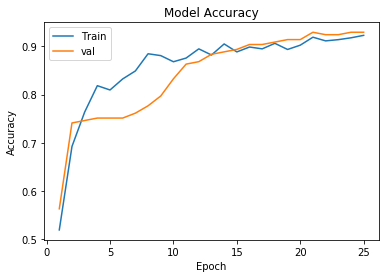

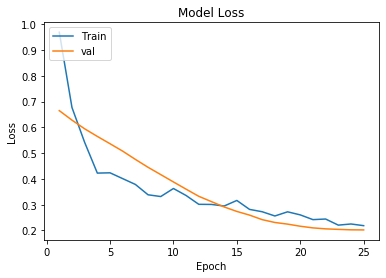

In [ ]:
learning_curve(history, 25)